# Examples on how to use `carculator_truck`

Github: https://github.com/romainsacchi/carculator-truck/

Publication:

*Does size matter? The influence of size, load factor, range autonomy and application type on the Life Cycle Assessment of current and future trucks.*

Romain Sacchi, Christian Bauer, Brian Cox

Submitted to Environmental Science and Technology ([link](https://pubs.acs.org/doi/10.1021/acs.est.0c07773))

# Truck model

Import the library

In [1]:
from carculator_truck import *
import matplotlib.pyplot as plt

Load the default vehicles parameters

In [2]:
tip = TruckInputParameters()

Define the calculation mode: static or stochastic(number of iterations)
* `static`: the model use one value for each parameter: the most likely value
* `stochastic`: the model uses a range of values pseudo-randomly generated on the basis of a probability distribution. The number of values generated is given by the integer argument passed to `.stochastic()`

In [3]:
tip.static()

Fill-in the array that will be used to create the car models

In [4]:
dcts, array = fill_xarray_from_input_parameters(tip)

We can check the powertrains, sizes and yaers considered

In [5]:
list(array.powertrain.values)

['BEV', 'FCEV', 'HEV-d', 'ICEV-d', 'ICEV-g', 'PHEV-c-d', 'PHEV-d', 'PHEV-e']

2000, 2010, 2020, 2030, 2040 and 2050 are the default years

In [6]:
list(array.year.values)

[2000, 2010, 2020, 2030, 2040, 2050]

And there are several size classes, refering to the gross vehicle weight (note that you cannot call the "size" dimension as previsouly done with "powertrain" and "year", because "size" also happens to be a property of the array object).

In [7]:
list(array.coords["size"].values)

['18t', '26t', '3.5t', '32t', '40t', '60t', '7.5t']

## Interpolate between default years

It is possible to derive truck models for other years by interpolating between two years. It is not advised to extrapolate beyond 2050 though.

In [8]:
array = array.interp(year=[2018, 2022, 2035],  kwargs={'fill_value': 'extrapolate'})
list(array.year.values)

[2018, 2022, 2035]

## Driving cycles

We can create now the truck models, using the default parameters, while specifying a driving cycle. Three driving cycles are available, and default range autonomy values are associated to each of these driving cycles:

* Urban delivery (150 km)
* Regional delivery (400 km)
* Long haul (800 km)

If not driving cycle is specified, "Urban delivery" is chosen.

In [9]:
tm = TruckModel(array, cycle='Long haul')

To build the vehicles and claculate their energy consumption, use the `set_all()` method.

In [10]:
tm.set_all()

Finding solutions for trucks...
Long haul driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 800 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-------+--------+-------+------+------+------+-------+
| Payload (in tons) |  18t  |  26t   |  3.5t | 32t  | 40t  | 60t  |  7.5t |
+-------------------+-------+--------+-------+------+------+------+-------+
|     BEV, 2018     |   /   |   /    |   /   |  /   |  /   |  /   |   /   |
|     BEV, 2022     | -3.0- |  7.1   |  -0.6 | 10.8 | 13.8 | 19.3 |  0.0  |
|     BEV, 2035     |  7.4  | -12.0- | -1.0- | 13.8 | 13.8 | 19.3 | -2.0- |
|     FCEV, 2018    |   /   |   /    |   /   |  /   |  /   |  /   |   /   |
|     FCEV, 2022    |  7.4  | -13.0- |  1.1  | 13.8 | 13.8 | 19.3 |  2.6  |
|     FCEV, 2035    |  7.4  |  13.4  |  1.1  | 13.8 | 13.8 | 19.3 |  2.6  |
|    HEV-d, 2018    |   /   |   /    |   /   |  /   |  /  

## Narrow down scope of analysis

If you do not wish to analyze all these trucks, you can also narrow down the scope.
Here for example, we narrow the scope down to 40t electric and diesel trucks in 2020.

In [11]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV", "ICEV-d"],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)
tm = TruckModel(array, cycle='Long haul')
tm.set_all()

Finding solutions for trucks...
Long haul driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 800 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+--------+
| Payload (in tons) |  40t   |
+-------------------+--------+
|     BEV, 2020     | -13.0- |
|    ICEV-d, 2020   |  13.8  |
+-------------------+--------+


## Plot driving cycle

We can easily plot the driving cycle, to have a idea...
Here are the first 100 seconds of the VECTO's "Long haul" driving cycle, for the truck sizes.

Text(0.5, 0, 'second')

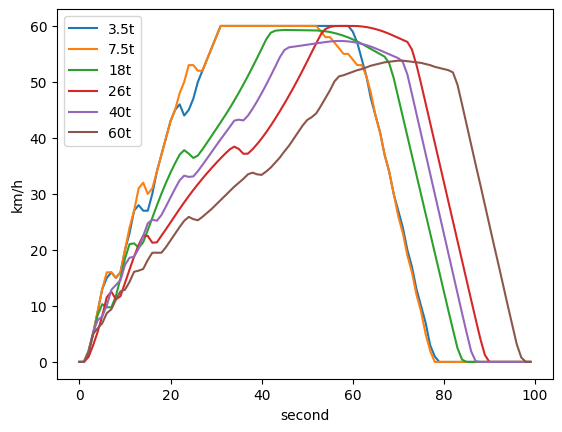

In [12]:
import matplotlib.pyplot as plt
from carculator_truck import *
%matplotlib inline
sizes = ["3.5t", "7.5t", "18t", "26t", "40t", "60t"]
plt.plot(get_driving_cycle(size=sizes, name="Long haul")[:100])
plt.legend(sizes)
plt.ylabel("km/h")
plt.xlabel("second")

## Using own driving cycle

Text(0.5, 0, 'second of driving')

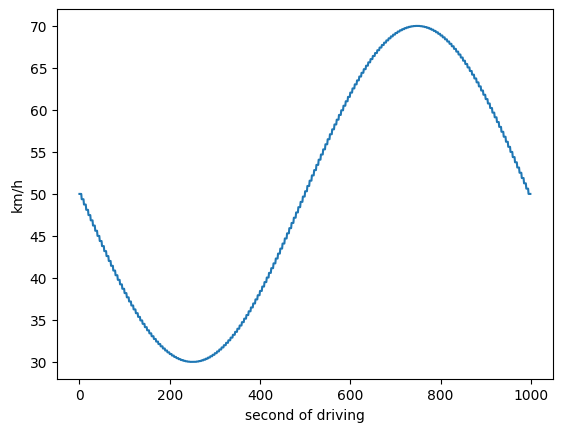

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from carculator import *
x = np.linspace(-np.pi, np.pi, 200)
cycle = np.sin(x)*20 + 50
cycle = np.repeat(cycle, 5)
plt.plot(np.arange(0,1000), cycle)

plt.ylabel('km/h')
plt.xlabel('second of driving')

In [14]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV", "ICEV-d"],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)
tm = TruckModel(array, cycle=cycle)
tm.set_all()

Finding solutions for trucks...
A custom driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 800 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
|    ICEV-d, 2020   | 8.8 |
+-------------------+-----+


## Override input parameters

Input parameters can be modified in `array` before passing it to `TruckModel`.

## Specific range autonomy

For a given driving cycle, a different range autonomy can be given than the default one.

In [15]:
tm = TruckModel(array, cycle='Urban delivery', target_range=600)
tm.set_all()

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 600 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
|    ICEV-d, 2020   | 8.8 |
+-------------------+-----+


### Override lifetime

In [16]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV", "ICEV-d"],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)

########################
array.loc[dict(parameter="lifetime kilometers")] = 2000000
########################
tm = TruckModel(array, cycle=cycle)
tm.set_all()
print(tm["lifetime kilometers"])

Finding solutions for trucks...
A custom driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 800 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
|    ICEV-d, 2020   | 8.8 |
+-------------------+-----+
<xarray.DataArray (size: 1, powertrain: 2, year: 1, value: 1)>
array([[[[2000000.]],

        [[2000000.]]]], dtype=float32)
Coordinates:
  * size        (size) <U3 '40t'
  * powertrain  (powertrain) <U6 'BEV' 'ICEV-d'
    parameter   <U64 'lifetime kilometers'
  * year        (year) int64 2020
  * value       (value) int64 0


## Override calculated parameters

### Override cargo mass
To override the cargo mass, this needs to be specified in `TruckModel`, in kilograms.
If you give a payload that exceeds the load carrying capacity, it will be trimmed to the load carrying capacity.

In [17]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV", "ICEV-d"],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)

tm = TruckModel(
    array=array,
    payload={
        ("ICEV-d", "40t", 2020): 8000,
        ("BEV", "40t", 2020): 6000,    
    }
)

tm.set_all()

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 6.0 |
|    ICEV-d, 2020   | 8.0 |
+-------------------+-----+


### Override annual mileage
To override the annual mileage, this needs to be specified in TruckModel, in kilometers per year.
This, together with the `lifetime kilometers` value will define the truck's lifeimte (in years).

In [18]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV", "ICEV-d"],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)

tm = TruckModel(
    array=array,
    annual_mileage={
        ("ICEV-d", "40t", 2020): 15000,
        ("BEV", "40t", 2020): 13000,    
    }
)

tm.set_all()

print(tm["kilometers per year"])

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
|    ICEV-d, 2020   | 8.8 |
+-------------------+-----+
<xarray.DataArray (size: 1, powertrain: 2, year: 1, value: 1)>
array([[[[13000.]],

        [[15000.]]]], dtype=float32)
Coordinates:
  * size        (size) <U3 '40t'
  * powertrain  (powertrain) <U6 'BEV' 'ICEV-d'
    parameter   <U64 'kilometers per year'
  * year        (year) int64 2020
  * value       (value) int64 0


### Override power
The engine power of trucks can be overriden by passing the values, in kilowatts, to `TruckModel`, instead of being defined by the truck's mass and a mass-to-power ratio.

In [19]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV", "ICEV-d"],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)

tm = TruckModel(
    array=array,
    power={
        ("ICEV-d", "40t", 2020): 260,
        ("BEV", "40t", 2020): 450,    
    }
)

tm.set_all()

print(tm[["combustion power", "electric power"]])

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
|    ICEV-d, 2020   | 8.8 |
+-------------------+-----+
<xarray.DataArray (size: 1, powertrain: 2, parameter: 2, year: 1, value: 1)>
array([[[[[  0.]],

         [[450.]]],


        [[[260.]],

         [[  0.]]]]], dtype=float32)
Coordinates:
  * size        (size) <U3 '40t'
  * powertrain  (powertrain) <U6 'BEV' 'ICEV-d'
  * parameter   (parameter) <U64 'combustion power' 'electric power'
  * year        (year) int64 2020
  * value       (value) int64 0


### Override fuel consumption
The energy consumption of trucks can be overriden. The values need to be passed to `TruckModel`, in kilojoules per vkm.

In [20]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV", "ICEV-d"],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)

tm = TruckModel(
    array=array,
    energy_consumption={
        ("ICEV-d", "40t", 2020): 13000, # kj per km,
        ("BEV", "40t", 2020): 4500 # kj per km,    
    }
)

tm.set_all()

print(tm["TtW energy"])

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.

Overriding TtW energy for ICEV-d 40t 2020 with 13000 kj/km
Overriding TtW energy for BEV 40t 2020 with 4500 kj/km
Overriding TtW energy for ICEV-d 40t 2020 with 13000 kj/km
Overriding TtW energy for BEV 40t 2020 with 4500 kj/km

'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
|    ICEV-d, 2020   | 8.8 |
+-------------------+-----+
<xarray.DataArray (size: 1, powertrain: 2, year: 1, value: 1)>
array([[[[ 4500.]],

        [[13000.]]]], dtype=float32)
Coordinates:
  * size        (size) <U3 '40t'
  * powertrain  (powertrain) <U6 'BEV' 'ICEV-d'
    parameter   <U64 'TtW energy'
  * year        (year) int64 2020
  * value       (value) int64 0


### Override vehicle mass
The target mass, in kilograms, needs to be passed to `TruckModel`. The model will increment/decrement the use of light-weighting materials until the curb mass reaches the target mass. The `curb mass` is not always ending up precisely on the target mass, but generally close to.

In [21]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV", "ICEV-d"],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)

tm = TruckModel(
    array=array,
    target_mass={
        ("ICEV-d", "40t", 2020): 13000, # kj per km,
        ("BEV", "40t", 2020): 16000 # kj per km,    
    }
)

tm.set_all()

print(tm["curb mass"])

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
|    ICEV-d, 2020   | 8.8 |
+-------------------+-----+
<xarray.DataArray (size: 1, powertrain: 2, year: 1, value: 1)>
array([[[[16049.838]],

        [[13000.026]]]], dtype=float32)
Coordinates:
  * size        (size) <U3 '40t'
  * powertrain  (powertrain) <U6 'BEV' 'ICEV-d'
    parameter   <U64 'curb mass'
  * year        (year) int64 2020
  * value       (value) int64 0


### Override battery capacity
You cannot set the battery capacity (in kWh), because it is defined by the electric consumption of the vehicle and its target range autonomy,

### Select battery chemistry
The user can change the chemistry of the battery.
Options are: NMC, LFP, NCA and LTO.
Note that these battery types have different energy densities, and will result in a different battery mass to satisfy a same range autonomy (see documentation about energy storage).
The user can also specifiy a manufacture location, which will define the energy mix to use for its manufacture later at teh inventory building step.

In [22]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV",],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)

tm = TruckModel(
    array=array,
    energy_storage={
        "electric": {
            ("BEV", "40t", 2020): "NCA"
        },
        "origin": "CN"
    }
)

tm.set_all()

tm[["energy battery mass", "battery cell mass", "battery BoP mass", "battery cell mass share", "electric energy stored", "battery cell energy density"]].to_dataframe("val")

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
+-------------------+-----+


val
size powertrain parameter                   year value             
40t  BEV        energy battery mass         2020 0      1650.515259
                battery cell mass           2020 0       990.309204
                battery BoP mass            2020 0       660.206055
                battery cell mass share     2020 0         0.600000
                electric energy stored      2020 0       227.771118
                battery cell energy density 2020 0         0.230000

## Select country
The country of use can be specified -- if not, Switzerland is used.
It will affect a number of aspects, such as the sulfur content in fuel, the electricity mix, etc.
It has to be given as the ISO alpha-2 country code.

In [23]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV",],
    "size": ["40t"],
    "year": [2020]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)

tm = TruckModel(
    array=array,
    country="FR"
)

tm.set_all()

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
+-------------------+-----+


## Select fuel blend

`TruckModel` can also receive arguments relating to a fuel blend for each year for a specific vehicle, or for all of them. Fuel blends are specified as a dictionary.

Available fuels for fuel blends are:
* ICEV-d
    * diesel
    * biodiesel - cooking oil
    * biodiesel - algae
    * synthetic diesel - economic allocation
    * synthetic diesel - energy allocation
* ICEV-g
    * cng
    * biogas - sewage sludge
    * biogas - biowaste
    * syngas
* FCEV
    * electrolysis
    * smr - natural gas
    * smr - natural gas with CCS
    * smr - biogas
    * smr - biogas with CCS
    * atr - natural gas
    * atr - natural gas with CCS
    * atr - biogas
    * atr - biogas with CCS
    * coal gasification
    * wood gasification
    * wood gasification with CCS
    * wood gasification with EF
    * wood gasification with EF with CCS
    
Note: for BEV trucks, a custom electricity mix can be defined at a later stage. Also, if `electrolysis` is chosen as a fuel for FCEV, or if a synthetic fuel is chosen for ICEV-d or ICEV-g (`synthetic diesel`, `syngas`), the electricity mix defined will be used to produce the necessary hydrogen via electrolysis. If no user-defined electricity mix is passed, then the electricity correpsonding the country defined in `TruckModel` will be used. If no country is passed to `TruckModel`, the Swiss mix is chosen. 

In [24]:
# exmaple with ICEV-d trucks using a blend of 30% of synthetic diesel in 2020 and 35% in 2030
# in Czech Republic

from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["ICEV-d",],
    "size": ["40t"],
    "year": [2020, 2030]
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)

fb={
    "diesel":{
        "primary": {
            "type": "diesel",
            "share": [.7, .65]
        },
        "secondary": {
            "type": "synthetic diesel - energy allocation",
            "share": [.3, .35],
            }
    }
}

tm = TruckModel(
    array=array,
    country="CZ",
    fuel_blend=fb
)

tm.set_all()

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|    ICEV-d, 2020   | 8.8 |
|    ICEV-d, 2030   | 8.8 |
+-------------------+-----+


We can check the fuel blend like so:

In [25]:
tm.fuel_blend

{'diesel': {'primary': {'type': 'diesel',
   'share': array([0.7 , 0.65]),
   'name': ('diesel production, low-sulfur, petroleum refinery operation',
    'Europe without Switzerland',
    'kilogram',
    'diesel, low-sulfur'),
   'CO2': 3.15,
   'biogenic share': 0},
  'secondary': {'type': 'synthetic diesel - energy allocation',
   'share': array([0.3 , 0.35]),
   'name': ('diesel production, synthetic, from electrolysis-based hydrogen, energy allocation, at fuelling station',
    'RER',
    'kilogram',
    'diesel, synthetic, vehicle grade'),
   'CO2': 3.15,
   'biogenic share': 1}}}

When the truck model is defined, the vehicles can be modeled using `set_all()`.
A few electric vehicles end up with a driving mass superior to the permissible gross weight.
These vehicles will not be considered in the end-results.

In [26]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()

new_scope = {
    "powertrain": ["BEV", "ICEV-d"],
}
dcts, array = fill_xarray_from_input_parameters(tip, scope=new_scope)
tm = TruckModel(array, cycle='Long haul')
tm.set_all()

Finding solutions for trucks...
Long haul driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 800 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-------+--------+--------+------+--------+------+-------+
| Payload (in tons) |  18t  |  26t   |  3.5t  | 32t  |  40t   | 60t  |  7.5t |
+-------------------+-------+--------+--------+------+--------+------+-------+
|     BEV, 2000     |   /   |   /    |   /    |  /   |   /    |  /   |   /   |
|     BEV, 2010     |   /   |   /    |   /    |  /   |   /    |  /   |   /   |
|     BEV, 2020     | -2.0- |  5.7   | --1.0- | 9.3  | -13.0- | 19.3 |  -0.5 |
|     BEV, 2030     |  6.4  | -11.0- |  0.3   | 13.8 |  13.8  | 19.3 | -2.0- |
|     BEV, 2040     |  7.4  |  13.1  | -1.0-  | 13.8 |  13.8  | 19.3 |  2.6  |
|     BEV, 2050     |  7.4  |  13.4  |  1.1   | 13.8 |  13.8  | 19.3 |  2.6  |
|    ICEV-d, 2000   |  7.4  | -

Let's look at the fuel and electric consumption (liters per vkm and kWh per vkm), for Large trucks (40t).

In [27]:
(tm.array.sel(size='40t', value=0, parameter=['electricity consumption', 'fuel consumption']) * 100).to_dataframe("val")["val"].unstack()

year                                      2000        2010        2020  \
powertrain parameter                                                     
BEV        electricity consumption  176.218948  175.793671  180.598480   
           fuel consumption           0.000000    0.000000    0.000000   
ICEV-d     electricity consumption    0.000000    0.000000    0.000000   
           fuel consumption          32.110466   31.293116   28.820381   

year                                      2030        2040        2050  
powertrain parameter                                                    
BEV        electricity consumption  141.549011  130.465668  124.044540  
           fuel consumption           0.000000    0.000000    0.000000  
ICEV-d     electricity consumption    0.000000    0.000000    0.000000  
           fuel consumption          23.574764   21.404202   19.313015

One can print the list of input and calculated parameters

In [28]:
tip.parameters

['1-Pentene direct emissions, rural',
 '1-Pentene direct emissions, suburban',
 '1-Pentene direct emissions, urban',
 'Acetaldehyde direct emissions, rural',
 'Acetaldehyde direct emissions, suburban',
 'Acetaldehyde direct emissions, urban',
 'Acetone direct emissions, rural',
 'Acetone direct emissions, suburban',
 'Acetone direct emissions, urban',
 'Acrolein direct emissions, rural',
 'Acrolein direct emissions, suburban',
 'Acrolein direct emissions, urban',
 'Ammonia direct emissions, rural',
 'Ammonia direct emissions, suburban',
 'Ammonia direct emissions, urban',
 'Arsenic direct emissions, rural',
 'Arsenic direct emissions, suburban',
 'Arsenic direct emissions, urban',
 'Benzaldehyde direct emissions, rural',
 'Benzaldehyde direct emissions, suburban',
 'Benzaldehyde direct emissions, urban',
 'Benzene direct emissions, rural',
 'Benzene direct emissions, suburban',
 'Benzene direct emissions, urban',
 'Butane direct emissions, rural',
 'Butane direct emissions, suburban',


We can plot any attributes of the truck models. For example here, the battery capacity of all electric trucks in 2018.

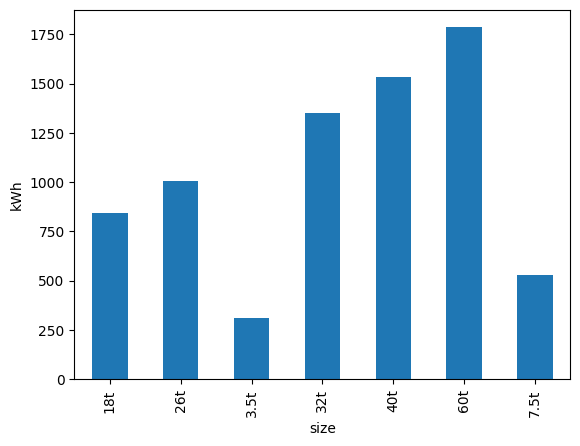

In [29]:
tm.array.sel(powertrain='BEV', year=2020, parameter='electric energy stored', value=0)\
    .to_dataframe("val").unstack()["val"].plot(kind="bar")
plt.ylabel('kWh')
plt.show()

## Uncertainty

The same can be done considering uncertainties in input parameters (here with a 2020 40t truck), using a Monte Carlo approach.
Most input parameters are defined with an uncertainty distribution, which the model uses to generate pseudo-random values.

In [6]:
from carculator_truck import *
tip = TruckInputParameters()

# 50 iterations
tip.stochastic(250)
#tip.static()

dcts, array = fill_xarray_from_input_parameters(tip, scope={"size":["40t"], "year":[2030],})
tm = TruckModel(array, cycle="Long haul")
tm.set_all()

Finding solutions for trucks...
Long haul driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 800 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+------+
| Payload (in tons) | 40t  |
+-------------------+------+
|     BEV, 2030     | 13.8 |
|     FCEV, 2030    | 13.8 |
|    HEV-d, 2030    | 13.8 |
|    ICEV-d, 2030   | 13.8 |
|    ICEV-g, 2030   | 13.8 |
|    PHEV-d, 2030   | 13.8 |
+-------------------+------+


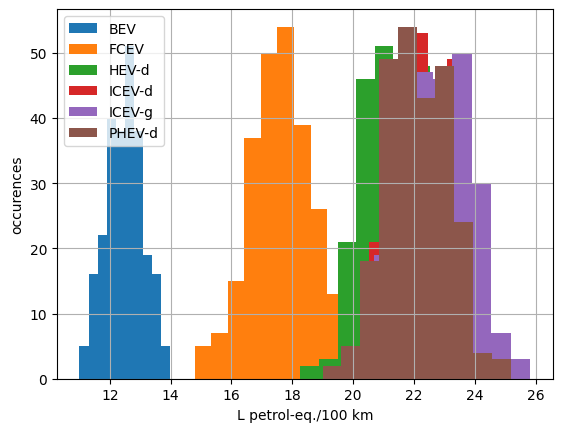

In [7]:
import matplotlib.pyplot as plt
TtW_energy = (tm.array.sel(size='40t', year=2030, parameter='TtW energy') / 34200 * 100).to_dataframe("val")["val"].groupby("powertrain") # assuming 34.2 MJ/L petrol
TtW_energy.hist()
plt.xlabel('L petrol-eq./100 km')
plt.ylabel('occurences')
plt.legend(TtW_energy.sum().index.tolist())

We can check the randomly generated values for any parameter like so. Here, for the diesel consumption, in liters/100 km.

In [10]:
tm.array.sel(size='40t', year=2030, parameter='fuel consumption', powertrain="ICEV-d") * 100

<xarray.DataArray (value: 250)>
array([22.476265, 24.030392, 20.949783, 22.875921, 20.997648, 22.462765,
       20.478497, 20.348803, 22.781393, 21.504442, 20.820751, 20.45522 ,
       22.560017, 21.298513, 21.513681, 22.765564, 22.195717, 22.05951 ,
       22.14343 , 20.110367, 22.221323, 20.980978, 22.90551 , 22.08366 ,
       22.012142, 21.030104, 20.454988, 22.589308, 20.758392, 22.946222,
       21.522535, 20.411396, 20.90064 , 22.91827 , 22.35553 , 20.283709,
       21.124735, 22.63765 , 22.940435, 23.391993, 19.64291 , 20.572765,
       21.348635, 21.632069, 20.684261, 22.788364, 21.970455, 21.816519,
       21.363228, 21.169304, 19.85431 , 20.88684 , 19.72356 , 21.73545 ,
       20.312223, 20.375368, 21.462057, 21.212248, 23.429867, 21.088018,
       19.220648, 22.176102, 21.285826, 23.018171, 20.483213, 22.456438,
       20.207115, 22.123161, 22.585865, 22.681318, 21.185299, 21.526905,
       22.010456, 23.170444, 23.153511, 20.860096, 20.5611  , 20.081598,
       21.039711, 20.339928, 21.883982, 21.70317 , 20.599464, 22.991243,
       22.12775 , 20.368402, 21.764275, 20.768902, 20.28753 , 20.345327,
       22.717875, 19.843874, 21.516176, 23.265974, 20.525375, 22.270288,
       21.304918, 20.306583, 21.354502, 22.36353 , 21.142616, 22.321863,
       20.233692, 21.72376 , 21.624487, 21.762735, 20.71584 , 20.343176,
       23.07917 , 20.805359, 21.712662, 20.811779, 20.951494, 20.949215,
       22.486273, 21.4682  , 22.000494, 21.54287 , 20.76593 , 18.4987  ,
...
       22.238531, 22.01114 , 20.653875, 22.533146, 18.7616  , 22.92712 ,
       22.772892, 20.638725, 21.617153, 22.110117, 20.683147, 20.287565,
       21.473602, 20.360687, 20.129984, 22.784256, 21.363516, 22.375622,
       21.241447, 20.87464 , 23.076136, 19.25994 , 21.385433, 22.249117,
       22.085306, 22.650423, 21.090155, 22.412949, 21.987455, 23.243202,
       20.412714, 21.852966, 23.245071, 21.367838, 22.247904, 20.768305,
       22.291592, 20.41978 , 23.484415, 21.68727 , 20.392952, 19.707825,
       19.77083 , 22.274082, 22.779932, 20.630014, 22.226202, 21.089088,
       21.418669, 22.740156, 20.21282 , 21.071829, 24.65937 , 20.452387,
       21.32365 , 21.3599  , 22.918636, 22.786556, 21.840544, 21.564074,
       22.22144 , 20.025703, 22.040638, 21.124554, 20.698448, 21.371023,
       22.331646, 21.26997 , 23.30028 , 21.517996, 22.144186, 21.34911 ,
       22.896505, 22.007408, 20.8862  , 21.336258, 21.7848  , 21.189617,
       22.411976, 22.313892, 21.150124, 22.963223, 20.371058, 24.37239 ,
       21.71525 , 21.891321, 22.16821 , 22.673222, 22.714773, 20.6559  ,
       22.251293, 22.27905 , 20.56293 , 23.54775 , 21.178247, 21.527853,
       21.02164 , 22.404774, 19.963972, 23.33867 , 20.902256, 21.88493 ,
       21.679316, 22.213196, 21.10179 , 22.259373, 22.25786 , 22.4372  ,
       21.821867, 21.51776 , 21.89038 , 21.96389 , 21.622253, 22.971693,
       21.301752, 21.808092, 21.791918, 20.504969], dtype=float32)
Coordinates:
    size        <U3 '40t'
    powertrain  <U8 'ICEV-d'
    parameter   <U64 'fuel consumption'
    year        int64 2030
  * value       (value) int64 0 1 2 3 4 5 6 7 ... 243 244 245 246 247 248 249

We can look at noise emissions. We see that most noise is emitted in rural environment (because the Long haul driving cycle is mostly taking place outside of cities). Noise emissions are dependent of the driving cycle chosen.

Text(0, 0.5, 'joules per km')

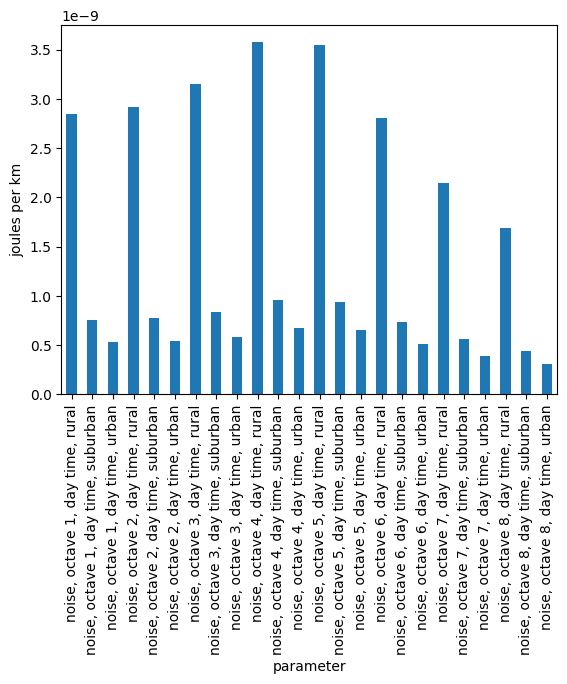

In [12]:
list_param = list(tm.array.parameter.values)
noise_emissions = [x for x in list_param if 'noise' in x]
data = tm.array.sel(parameter=noise_emissions, year=2030, size='40t', powertrain='ICEV-g', value=0)\
    .to_dataframe(name='noise emissions')['noise emissions']
data[data>0].plot(kind='bar')
plt.ylabel('joules per km')

### Calculation of the inventories

`InventoryTruck` takes several arguments:

* `TruckModel`, mandatory: instance of TruckModel
* `background_configuration`, optional: dictionary where specific parameters for electricity mix, battery technology, etc. can be defined
* `scenario`, optional: background prospective energy scenario that should be used. Can be "SSP2-NPi", "SSP2-PkBudg1150", "SSP2-PkBudg500", "static". "SSP2-Base" is used if unspecified. More info on REMIND scenarios [here](https://premise.readthedocs.io/en/latest/introduction.html#default-iam-scenarios)
* `method`, optional: impact characterization method that should be used. Can be: "recipe" or "ilcd". "recipe" is used if unspecified.
* `indicator`, optional: can be "midpoint" or "endpoint". Endpoint indicators only available for Recipe 2008. "midpoint" used if unspecified.
* `functional_unit`: units impacts should be normalized by. Can be `vkm` for vehicle-kilometer, or `tkm` for ton-kilometer.


Hence, it can be as simple as this:

In [37]:
from carculator_truck import *
tip = TruckInputParameters()

tip.static()
dcts, array = fill_xarray_from_input_parameters(tip, scope={"size":["40t"], "year":[2020]})
tm = TruckModel(array, cycle="Urban delivery")
tm.set_all()
ic = InventoryTruck(tm)

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|     BEV, 2020     | 8.8 |
|     FCEV, 2020    | 8.8 |
|    HEV-d, 2020    | 8.8 |
|    ICEV-d, 2020   | 8.8 |
|    ICEV-g, 2020   | 8.8 |
|    PHEV-d, 2020   | 8.8 |
+-------------------+-----+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * between 2020 and 2031, % of renewable: 75.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2020 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2020 _________________________________________ 22.0%
 * diesel is com

In [38]:
ic.func_unit

'vkm'

In [39]:
ic.method

'recipe'

In [40]:
ic.indicator

'midpoint'

In [41]:
ic.impact_categories

{'GWP100a': {'method': 'IPCC 2013',
  'category': 'GWP100a',
  'type': 'midpoint',
  'abbreviation': 'GWP100',
  'unit': 'kg CO2-Eq.',
  'source': 'https://www.ipcc.ch'},
 'freshwater ecotoxicity': {'method': 'ReCiPe 2008 Midpoint (H) V1.13',
  'category': 'freshwater ecotoxicity',
  'type': 'midpoint',
  'abbreviation': 'FETPinf',
  'unit': 'kg 1,4-DC.',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'human toxicity': {'method': 'ReCiPe 2008 Midpoint (H) V1.13',
  'category': 'human toxicity',
  'type': 'midpoint',
  'abbreviation': 'HTPinf',
  'unit': 'kg 1,4-DC.',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'marine ecotoxicity': {'method': 'ReCiPe 2008 Midpoint (H) V1.13',
  'category': 'marine ecotoxicity',
  'type': 'midpoint',
  'abbreviation': 'METPinf',
  'unit': 'kg 1,4-DB.',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'terrestrial ecotoxicity': {'method': 'ReCiPe 2008 Midpoint (H) V1.13',
  'category': 'terrestrial ecotoxicity',
  'ty

In [42]:
res = ic.calculate_impacts()

Text(0, 0.5, 'kg CO2-eq./tkm')

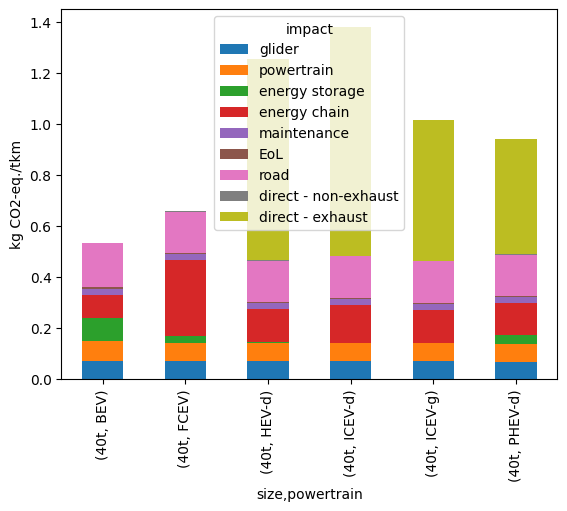

In [43]:
res.sel(value=0, year=2020, impact_category="climate change").to_dataframe("val").unstack()["val"].plot(kind="bar", stacked=True)
plt.ylabel("kg CO2-eq./tkm")

Let's look at the same results, but based on a ton-kilometer

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * between 2020 and 2031, % of renewable: 75.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2020 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2020 _________________________________________ 22.0%
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 5.0%
 * *********************************************************************


Text(0, 0.5, 'kg CO2-eq./tkm')

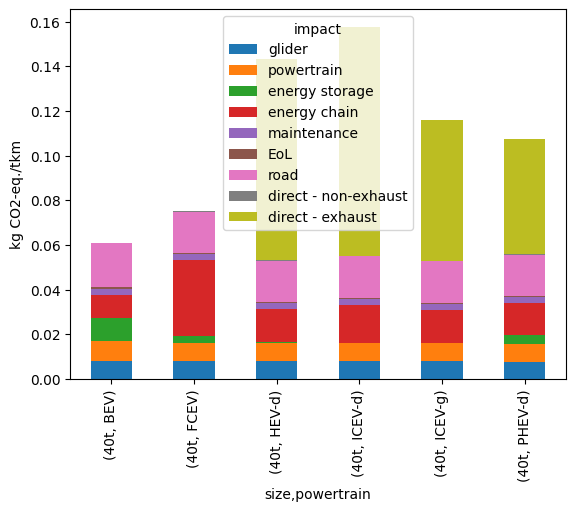

In [44]:
ic = InventoryTruck(tm, functional_unit="tkm")
res = ic.calculate_impacts()
res.sel(value=0, year=2020, impact_category="climate change").to_dataframe("val").unstack()["val"].plot(kind="bar", stacked=True)
plt.ylabel("kg CO2-eq./tkm")

Or more complex, like this below, where:
* an electricity mix is defined (100% hydro)
* a battery type and place of manufacture are defined. Battery type can be "NMC", "NCA" or "LFP". Place of production can be any alpha-2 country code, in addition to "RER".
* a hydrogen tank type is defined. It can be "carbon fiber", "hdpe" or "aluminium". It refers to the lining system.
* a climate-ambitious [REMIND](https://www.pik-potsdam.de/en/institute/departments/transformation-pathways/models/remind) PkBudg1150 energy scenario is chosen to adapt the ecoinvent background database.
* the endpoint indicators of the Recipe 2008 method are selected (ReCiPe midpoint and ILCD midpoint indicators also available).

In [45]:
# electricity technologies available to make up mix
list(ic.elec_map.keys())

['Hydro',
 'Nuclear',
 'Gas',
 'Solar',
 'Wind',
 'Biomass',
 'Coal',
 'Oil',
 'Geothermal',
 'Waste',
 'Biogas CCS',
 'Biomass CCS',
 'Coal CCS',
 'Gas CCS',
 'Wood CCS',
 'Hydro, reservoir',
 'Gas CCGT',
 'Gas CHP',
 'Solar, thermal',
 'Wind, offshore',
 'Lignite']

In [14]:
# 100% hydropower
bc={
    "custom electricity mix": [
        [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    ]
}

In [15]:
from carculator_truck import *
tip = TruckInputParameters()

scope={
    "powertrain":["ICEV-d", "BEV"],
    "size":["40t"],
    "year":[2020]
}

tip.static()
dcts, array = fill_xarray_from_input_parameters(tip, scope=scope)
tm = TruckModel(
    array,
    cycle="Urban delivery",
    country="DE",
    energy_storage={
        "electric": {
            ("BEV", "40t", 2020): "LFP"
        },
        "origin": "NO",
        "hydrogen": {
            "tank type": "carbon fiber"
        }
    }
)
tm.set_all()

ic = InventoryTruck(
    tm,
    background_configuration=bc,
    scenario="SSP2-PkBudg1150",
    method="recipe",
    indicator="endpoint"
)

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|    ICEV-d, 2020   | 8.8 |
|     BEV, 2020     | 8.8 |
+-------------------+-----+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is DE.
 * Power and energy batteries produced in NO using ['LFP'] chemistry/ies
 * between 2020 and 2031, % of renewable: 100.0.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 5.0%
 * *********************************************************************


In [16]:
ic.mix

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [17]:
ic.func_unit

'vkm'

We can have a look at the underlying technology matrix, which has the dimensions [iterations, inputs, outputs].

In [2]:
ic.A[:10,:10, :10]

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]])

The labels of its rows and columns

In [3]:
list(ic.inputs.keys())[:10]

[('1-Pentene', ('air',), 'kilogram'),
 ('1-Pentene', ('air', 'low population density, long-term'), 'kilogram'),
 ('1-Pentene', ('air', 'non-urban air or from high stacks'), 'kilogram'),
 ('1-Pentene', ('air', 'urban air close to ground'), 'kilogram'),
 ('2,4-D', ('soil', 'agricultural'), 'kilogram'),
 ('AOX, Adsorbable Organic Halogen as Cl',
  ('water', 'surface water'),
  'kilogram'),
 ('ATR BM + CCS (MDEA), 98 (average), with digestate incineration, 25 bar',
  'CH',
  'megajoule',
  'Hydrogen, gaseous, 25 bar'),
 ('ATR BM, with digestate incineration, 25 bar',
  'CH',
  'megajoule',
  'Hydrogen, gaseous, 25 bar'),
 ('ATR NG + CCS (MDEA), 98 (average), 25 bar',
  'RER',
  'megajoule',
  'Hydrogen, gaseous, 25 bar'),
 ('ATR NG, 25 bar', 'RER', 'megajoule', 'Hydrogen, gaseous, 25 bar')]

You can check the available indicators from the method you selected.

In [4]:
ic.impact_categories

{'Ecosystems': {'method': 'ReCiPe 2008 Endpoint (H, A) V1.13',
  'category': 'Ecosystems',
  'type': 'endpoint',
  'abbreviation': '',
  'unit': 'species.lost',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'Human health': {'method': 'ReCiPe 2008 Endpoint (H, A) V1.13',
  'category': 'Human health',
  'type': 'endpoint',
  'abbreviation': '',
  'unit': 'DALY',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'Resources': {'method': 'ReCiPe 2008 Endpoint (H, A) V1.13',
  'category': 'Resources',
  'type': 'endpoint',
  'abbreviation': '',
  'unit': 'USD',
  'source': 'https://www.rivm.nl/documenten/6recipe111'},
 'Noise': {'method': 'Cucurachi et al. 2019',
  'category': 'Noise',
  'type': 'endpoint',
  'abbreviation': '',
  'unit': 'DALY',
  'source': 'https://onlinelibrary.wiley.com/doi/full/10.1111/jiec.12837'}}

# Impact assessment

And then you can solve the inventories and characterize impacts.

In [5]:
results = ic.calculate_impacts()

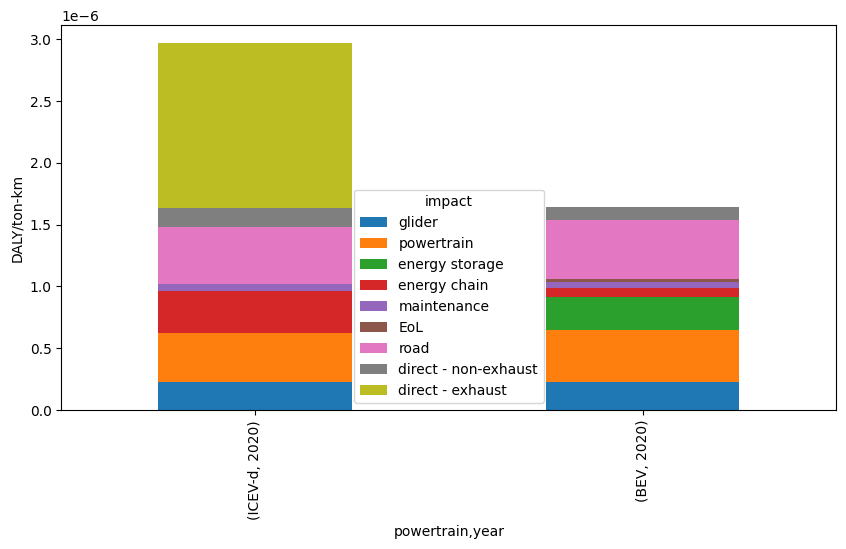

In [7]:
import matplotlib.pyplot as plt
results.sel(impact_category='Human health', size='40t', value=0)\
    .to_dataframe('impact')\
    .unstack(level=2)['impact']\
    .plot(kind='bar',
                stacked=True,
         figsize=(10,5))
plt.ylabel('DALY/ton-km')
plt.show()

Or with uncertainty (150 iterations). We just need to specify the number of iterations to `.stochastic()`.

Note: only the uncertainty at the vehicle level (incl. its components) is considered. Hence, no uncertainty is considered in the "background" inventories (e.g., steel production), or at the impact assessment level.
The only uncertainty/sensitivity in the background inventories one can "appreciate", is the one relating to the different future energy scenarios, going from a moderate climate policy ("SSP2-Base") to am amitious one ("SSP2-PkBudg1100"). Those scenarios will affect the background inventories in regard to efficiencies of power production, penetration of renewables, etc.

To include uncertainty from the background inventories, you need to export the vehicle inventories to a LCA software (e.g., Brightway2) and link them to the ecoinvent database.

In [8]:
from carculator_truck import *
tip = TruckInputParameters()

scope={
    "powertrain":["ICEV-d", "BEV"],
    "size":["40t"],
    "year":[2020]
}

tip.stochastic(100)

dcts, array = fill_xarray_from_input_parameters(tip, scope=scope)
tm = TruckModel(
    array,
    cycle="Urban delivery",
    country="DE",
    energy_storage={
        "electric": {
            ("BEV", "40t", 2020): "LFP"
        },
        "origin": "NO",
        "hydrogen": {
            "tank type": "carbon fiber"
        }
    }
)
tm.set_all()

bc={
    "custom electricity mix": [
        [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    ]
}

ic = InventoryTruck(
    tm,
    background_configuration=bc,
    scenario="SSP2-PkBudg1150",
    method="recipe",
    indicator="endpoint"
)

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|    ICEV-d, 2020   | 8.8 |
|     BEV, 2020     | 8.8 |
+-------------------+-----+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is DE.
 * Power and energy batteries produced in NO using ['LFP'] chemistry/ies
 * between 2020 and 2031, % of renewable: 100.0.
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 5.0%
 * *********************************************************************


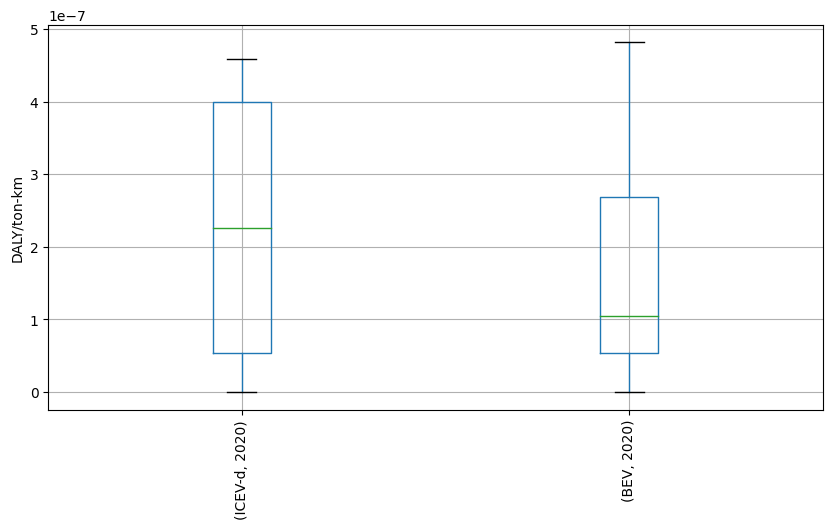

In [9]:
import matplotlib.pyplot as plt
results.sel(impact_category='Human health', size='40t', value=0)\
    .to_dataframe('impact')\
    .unstack()['impact'].T\
    .boxplot(showfliers=False,
         figsize=(10,5))
plt.ylabel('DALY/ton-km')
plt.xticks(rotation=90)
plt.show()

# Sensitivity analysis

`carculator_truck` has a function to calculate the sensitivity of characterized results in regard to the inputs parameters of `TruckModel`. This function generates a number of "scenarios" within which one input parameter has its value increased by 10%. The newly calculated results are stored and compared to the reference scneario (where none of the input parameter values are modified).

To do so, we run the model in **static** mode, but we give the argument `sensitivity=True` to `fill_xarray_from_input_parameters()` and `calculate_impacts()`.

In [2]:
from carculator_truck import *
import matplotlib.pyplot as plt
import numpy as np
tip = TruckInputParameters()
tip.static()

scope={
    "powertrain":["ICEV-d", "BEV", "FCEV", "ICEV-g"],
    "size":["40t"],
    "year":[2020]
}


_, array = fill_xarray_from_input_parameters(tip, sensitivity=True, scope=scope)
tm = TruckModel(array)
tm.set_all()

ic = InventoryTruck(tm,)
res = ic.calculate_impacts(sensitivity=True)

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+
| Payload (in tons) | 40t |
+-------------------+-----+
|    ICEV-d, 2020   | 8.8 |
|     BEV, 2020     | 8.8 |
|     FCEV, 2020    | 8.8 |
|    ICEV-g, 2020   | 8.8 |
+-------------------+-----+
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is CH.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * between 2020 and 2031, % of renewable: 75.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2020 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2020 _________________________________________ 22.0%
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 ________

We retrieve an array that contains characterized results for a number of scenarios (where only one parameter value is increased in each scenario), normalized in regard to the reference scenario. Hence, values above 1 indicate that increasing the parameter value given in the `parameter` dimension of the array by 10% led to an increase in the characterized results (for the impact category selected).

We can turn the array into a `pandas` dataframe for better visualization. We can also remove the results that equal to 1 (which indicate that increasing the value of the selected parameter by 10% had no influence on the characterized result).

Let's see the result for a 40-ton battery electric vehicle in 2020, in regard to the impact category **Climate change**.

Text(0.5, 1.0, 'Parameters value increased by 10%')

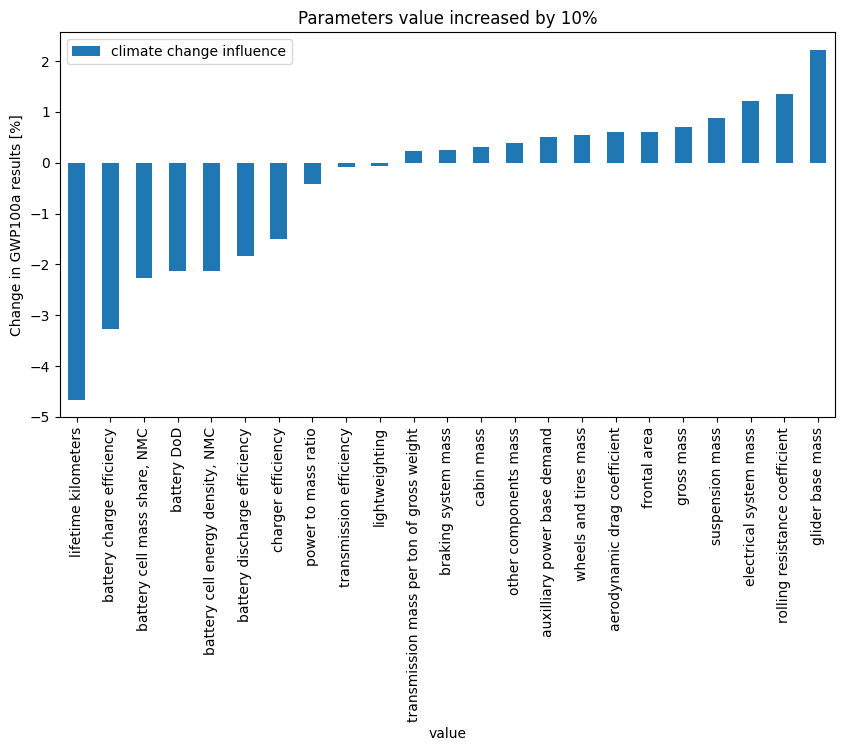

In [3]:
df = res.sel(impact_category="climate change", powertrain="BEV", size="40t", year=2020)\
    .to_dataframe("climate change influence")
df = df.loc[(df["climate change influence"] > 1.001)|(df["climate change influence"] < 1),:]
df["climate change influence"] -= 1 
df["climate change influence"] *= 100 
df = df.sort_values("climate change influence", ascending=True)
df.plot(y = "climate change influence", kind="bar", figsize=(10,5))
plt.ylabel("Change in GWP100a results [%]")
plt.title("Parameters value increased by 10%")

Therefore, we can see that the characterized results for **Climate change** are negatively influenced by changes of +10% in the parameter value for the charge and discharge efficiency of the battery as well as the drivetrain and engine efficiency.
The load factor (total cargo mass) and the energy density of cells are also very important factors.

On the other end, the results are positively influenced by changes in the parameter value for the glider base mass, as well as the mass of the different vehicle components (and the lightweighting factor).

# Export inventories

Inventories in `static` calculation mode can be exported to different formats:
* as an Excel file compatible for import with `brightway2`
* a Brightway2 LCIImporter object
* a Python dictionary

## Export inventories without uncertainty 

Inventories are exported to an Excel file which can later be imported into `brightway2`. The `export_to_excel()` function returns the filepath where the Excel file can be found (the same directory as the script calling it).

In [1]:
from carculator_truck import *
import matplotlib.pyplot as plt
tip = TruckInputParameters()
tip.static()
dcts, array = fill_xarray_from_input_parameters(tip)
tm = TruckModel(array)
tm.set_all()

scope = {'powertrain':['ICEV-d', 'PHEV-d'],}

ic = InventoryTruck(tm)

Finding solutions for trucks...
Urban delivery driving cycle is selected. 
Vehicles will be designed to achieve a minimal range of 150 km.


'-' vehicle with driving mass superior to the permissible gross weight.
'/' vehicle not available for the specified year.
+-------------------+-----+-----+------+-----+-----+------+------+
| Payload (in tons) | 18t | 26t | 3.5t | 32t | 40t | 60t  | 7.5t |
+-------------------+-----+-----+------+-----+-----+------+------+
|     BEV, 2000     |  /  |  /  |  /   |  /  |  /  |  /   |  /   |
|     BEV, 2010     |  /  |  /  |  /   |  /  |  /  |  /   |  /   |
|     BEV, 2020     | 2.7 | 6.3 | 0.8  | 8.8 | 8.8 | 16.4 | 1.8  |
|     BEV, 2030     | 2.7 | 6.3 | 0.8  | 8.8 | 8.8 | 16.4 | 1.8  |
|     BEV, 2040     | 2.7 | 6.3 | 0.8  | 8.8 | 8.8 | 16.4 | 1.8  |
|     BEV, 2050     | 2.7 | 6.3 | 0.8  | 8.8 | 8.8 | 16.4 | 1.8  |
|     FCEV, 2000    |  /  |  /  |  /   |  /  |  /  |  /   |  /   |
|     FCEV, 2010    |  /  |  /  |  /   |  /  |  /  |  /   |  /   |


Here is the call to export the inventories as a Brightway2-compatible Excel file.
Note that you can specify a directory where the file should be saved.
Otherwise, it will be saved in the root directory of `carculator_truck`

In [2]:
ic.export_lci?

Signature:
ic.export_lci(
    ecoinvent_version='3.8',
    filename='carculator_lci',
    directory=None,
    software='brightway2',
    format='bw2io',
)
Docstring:
Export the inventory. Can export to Simapro (as csv), or brightway2 (as bw2io object, file or string).
:param db_name:
:param ecoinvent_version: str. "3.5", "3.6", "3.7" or "3.8"
:param filename: str. Name of the file to be exported
:param directory: str. Directory where the file is saved
:param software: str. "brightway2" or "simapro"
:param format: str. "bw2io" or "file" or "string"
::return: inventory, or the filepath where the file is saved.
:rtype: list
File:      ~/GitHub/carculator_utils/carculator_utils/inventory.py
Type:      method


In [3]:
i = ic.export_lci(
    software="brightway2",
    ecoinvent_version='3.6',
    format="file"
    #directory=r"a_file/path/here"
)

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 1837
Total time elapsed: 00:00:01


In [4]:
i

'/Users/romain/GitHub/carculator_truck/examples/carculator_lci_bw2.xlsx'

If you want instead to use the inventories in SimaPro 9:

In [5]:
i = ic.export_lci(
    software="simapro",
    ecoinvent_version='3.6',
    format="file"
)

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 1837
Total time elapsed: 00:00:01


In [6]:
i

'/Users/romain/GitHub/carculator_truck/examples/carculator_lci_simapro.csv'

In [9]:
i = ic.export_lci(
    software="brightway2",
    ecoinvent_version='3.8',
    format="bw2io"
)

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 1837
Total time elapsed: 00:00:01


In [10]:
i

Here, the inventory is instead returned as a `brightway2` LCIImporter object, which can be directly registered into `brightway2`.

Currently, the inventories can be exported so as to link with **ecoinvent cut-off** 3.6 to 3.8.
The ecoinvent version can be specified in the `ecoinvent_version` argument.

In [11]:
import brightway2 as bw
bw.projects.set_current('new4')

i.apply_strategies()

i.match_database(fields=["name", "unit", "location"])
if 'additional_biosphere' not in bw.databases:
    i.create_new_biosphere('additional_biosphere')
i.match_database("ecoinvent 3.8 cutoff",  fields=["reference product", "name", "unit", "location"])
i.match_database('biosphere3',  fields=["name", "unit", "categories"])
i.match_database('additional_biosphere',  fields=["name", "unit", "categories"])

i.statistics()
#i.write_database()

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: assign_only_product_as_production
Applying strategy: strip_biosphere_exc_locations
Applied 4 strategies in 0.01 seconds
Applying strategy: link_iterable_by_fields
Creating new biosphere database: additional_biosphere
Applying strategy: link_iterable_by_fields
Applied 1 strategies in 0.05 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
737 datasets
21984 exchanges
0 unlinked exchanges
  


(737, 21984, 0)

Once the export database registered, the user can perform LCAs, like so:

In [31]:
FU = [{a:1} for a in bw.Database("carculator db") if "ICEV-d" in a["name"] and "2020" in a["name"]]
FU

[{'Heavy duty truck, ICEV-d, 40t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Medium duty truck, ICEV-d, 26t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Medium duty truck, ICEV-d, 18t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Heavy duty truck, ICEV-d, 60t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Medium duty truck, ICEV-d, 3.5t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1},
 {'Medium duty truck, ICEV-d, 7.5t gross weight, 2020, EURO-VI' (ton-kilometer, RER, None): 1}]

In [32]:
import pandas as pd
bw.calculation_setups['multiLCA'] = {'inv': FU, 'ia': [('IPCC 2013', 'climate change', 'GWP 100a')]}
myMultiLCA = bw.MultiLCA('multiLCA')
df_impact = pd.DataFrame(columns = [('IPCC 2013', 'climate change', 'GWP 100a')],
                         data = myMultiLCA.results,
                         index=[(k['name'], k['location'], k["database"]) for i in FU for k in i])


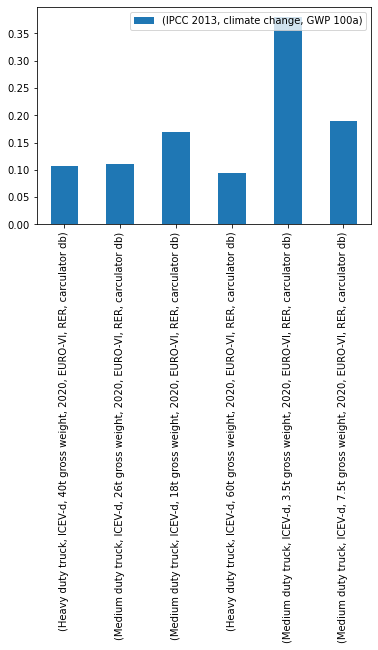

In [33]:
df_impact.plot(kind="bar", stacked=True)

Because the exchanges of the export inventories are tagged by main impact categories (e.g., direct, glider, powertrain, maintenance, etc.), it is also possible to do a contribution analysis by traversing the supply chain of the product system:

In [34]:
import bw2analyzer as bw2a
d = bw2a.traverse_tagged_databases(FU[0], ('IPCC 2013', 'climate change', 'GWP 100a'))
d[0]

defaultdict(int,
            {'other': 0.0187563286639458,
             'direct - exhaust': 0.07605538612410703,
             'energy chain': 0.01156049759572285,
             'energy storage': 0.0,
             'glider': 8.711647996311385e-05})